In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math

In [93]:
# url = 'https://gist.githubusercontent.com/zgulde/96991fedca29ff5371f5e7fa00d3fa95/raw/3e95d04e4ae544bf7b03b89dfde002ff502260a1/the_data.csv'
# df = pd.read_csv('url')

In [3]:
df = pd.read_csv('the_data.csv', parse_dates=['timestamp'], index_col='timestamp')

In [4]:
df.head()

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-04-30 00:00:00 to 2018-05-01 23:00:00
Data columns (total 2 columns):
x    48 non-null float64
y    48 non-null object
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [95]:
df.describe()

,x
count,48.000000
mean,0.026250
std,1.097024
min,-2.050000
25%,-0.842500
50%,0.190000
75%,0.687500
max,2.060000


In [96]:
df.groupby('y').describe()

x                                                      
  count      mean       std   min     25%   50%     75%   max
y                                                            
A  18.0 -0.110556  0.925784 -1.30 -0.9075 -0.08  0.2575  1.84
B  13.0 -0.053846  1.328731 -2.05 -0.8100  0.20  0.7400  1.91
C  17.0  0.232353  1.108594 -1.83 -0.1300  0.28  0.9800  2.06

In [97]:
# max values by y values

df.groupby('y').x.max()

y
A    1.84
B    1.91
C    2.06
Name: x, dtype: float64

In [99]:
# max value of group B
print(f'The highest value of group B:')
df.groupby('y').x.max().B

The highest value of group B:


1.91

# By Group

In [5]:
df.groupby('y').count()

,x
y,
A,18
B,13
C,17


In [103]:
# max value for B

print('The max value for group B:')
df.groupby('y').x.max().B
# group_B = df[df['y'] == 'B']
# group_B.max()

The max value for group B:


1.91

In [104]:
# avgerage value for A
print('The average value for group A is:')
df.groupby('y').x.mean().A

# group_A = df[df['y'] == 'A']
# group_A.mean()

The average value for group A is:


-0.11055555555555556

In [22]:
# min value for group C

group_C = df[df['y'] == 'C']
group_C.min()

x   -1.83
y       C
dtype: object

## Highest Sum = Group C

In [106]:
print('The group with the largest sum of values:')

df.groupby('y').x.sum().idxmax()

The group with the largest sum of values:


'C'

In [27]:
group_C['x'].sum()

3.95

In [30]:
group_A['x'].sum()

-1.99

In [29]:
group_B['x'].sum()

-0.7000000000000002

# Time Aggregates

In [35]:
# Sum of the x values for 2018-05-01

df['x'].loc['2018-05-01'].sum()

-4.02

In [109]:
df.groupby(df.index.date).x.sum()

2018-04-30    5.28
2018-05-01   -4.02
Name: x, dtype: float64

In [42]:
# mean value of each day

df.resample('D').mean()

,x
timestamp,
2018-04-30,0.2200
2018-05-01,-0.1675


In [110]:
# cooler way!

df.groupby(df.index.date).agg(['mean', 'median'])

x       
              mean median
2018-04-30  0.2200  0.175
2018-05-01 -0.1675  0.220

In [43]:
# median value of each day

df.resample('D').median()

,x
timestamp,
2018-04-30,0.175
2018-05-01,0.220


In [113]:
# day with largest x value

df.groupby(df.index.date).x.max().idxmax()

datetime.date(2018, 4, 30)

In [51]:
# day with the smallest value for C = 2018-05-01

df[df['y'] == 'C'].resample('D').min()

,x,y
timestamp,,
2018-04-30,-1.07,C
2018-05-01,-1.83,C


# Visualization

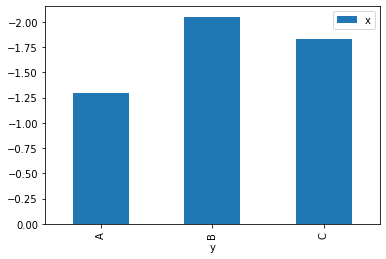

In [72]:
# visualize the min x value of each group with a bar chart

df.groupby('y').min().plot.bar().invert_yaxis()

plt.show()

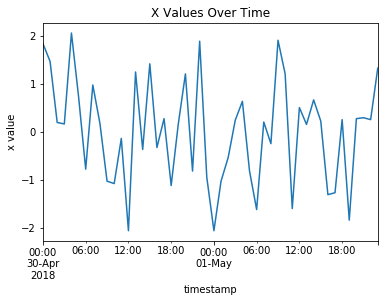

In [73]:
# visualize x over time

df['x'].plot()

plt.title('X Values Over Time')
plt.ylabel('x value')
plt.show()

In [ ]:
# visualize x over time by y value

df.groupby('y').

# More Aggregation

In [91]:
# What is the least frequent y value for 2018-04-30?
# What is the most frequent y value for each day?

df.resample('D').y.value_counts()

timestamp   y
2018-04-30  A    10
            B     7
            C     7
2018-05-01  C    10
            A     8
            B     6
Name: y, dtype: int64

AttributeError: 'DataFrame' object has no attribute 'freq'